# Introdução

Esta é uma análise do mercado de trabalho brasileiro na área de dados, com foco especial na satisfação dos colaboradores. Utilizo os dados dos anos de 2021 e 2022 do State of Data, que foram obtidos através da colaboração entre Data Hackers, a maior comunidade de dados do Brasil, e Bain & Company, consultoria global que auxilia empresas e organizações a impulsionar mudanças estratégicas para o futuro dos negócios.

A análise foi organizada em três partes: Na primeira exploro a relevância de avaliar a satisfação dos profissionais; na segunda, identifico alguns dos principais fatores que influenciam o contentamento profissional; e na última apresento uma ferramenta baseada em Machine Learning, que permite identificar se há felicidade dos colaboradores em relação ao trabalho. Todos os detalhes sobre o desenvolvimento da etapa final estão disponíveis em [meu GitHub](https://github.com/alanxfelipex/state-of-data-2022/) para aqueles que desejam se aprofundar no assunto.

Ademais, ressalto que todos os gráficos utilizados nesta analise seguem o [Guia de acessibilidade cromática para daltonismo: princípios para profissionais da indústria criativa](https://repositorio.ufsm.br/bitstream/handle/1/24809/guia-modo-padr%C3%A3o.pdf?sequence=3&isAllowed=y), fundamentado nos princípios desenvolvidos por Thiovane Pereira, da Universidade Federal de Santa Maria, buscando assim uma apresentação visual mais inclusiva.

Espero que esta análise contribua significativamente para o entendimento do mercado de trabalho na área de dados no Brasil, bem como para o aprimoramento da satisfação e bem-estar dos colaboradores e colaboradoras no setor.

In [36]:
# importando as biblioteca necessárias
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
import numpy as np

# configurando as cores
amarelo = '#FFD744'
vermelho = '#A80000'
azul = '#183154'
branco = "#FFFFFF"

# importando dados do state of data de 2022 (mais atual) e eliminando os duplicados
df = pd.read_csv("/kaggle/input/state-of-data-2022/State_of_data_2022.csv")
df = df.drop_duplicates()

# importando dados do state of data de 2021 (edição anterior) e eliminando os duplicados
df_2021 = pd.read_csv("/kaggle/input/state-of-data-2021/State of Data 2021 - Dataset - Pgina1.csv", low_memory=False)
df_2021 = df_2021.drop_duplicates()

# Renomeando as Colunas para melhor uso

df.rename(columns={ # colunas sobre a identidade dos colaboradores de 2022
    "('P0', 'id')" : "id",
    "('P1_a_1 ', 'Faixa idade')" : "idade",
    "('P1_b ', 'Genero')" : "genero",
    "('P1_c ', 'Cor/raca/etnia')" : "cor",
    "('P1_d ', 'PCD')" : 'pcd',
    "('P1_e ', 'experiencia_profissional_prejudicada')" : "experiencia_prejudicada",
    "('P1_i_2 ', 'Regiao onde mora')" : 'regiao',
    "('P1_l ', 'Nivel de Ensino')" : "ensino",
    "('P1_m ', 'Área de Formação')" : "area_de_formacao",
    "('P2_a ', 'Qual sua situação atual de trabalho?')" : "situacao_atual",
    "('P2_b ', 'Setor')" : "setor",
    "('P2_c ', 'Numero de Funcionarios')" : 'numero_de_funcionarios',
    "('P2_d ', 'Gestor?')" : "gestor",
    "('P2_f ', 'Cargo Atual')": "cargo_atual",
    "('P2_g ', 'Nivel')" : "nivel",
    "('P2_h ', 'Faixa salarial')": "faixa_salario",
    "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')": "experiencia_com_dados",
    "('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')" : "experiencia_com_TI_engenharia",
    "('P2_k ', 'Você está satisfeito na sua empresa atual?')" : "satisfeito",

    # Colunas sobre modelo de trabalho remoto de colaboradores de 2022
    "('P2_p ', 'Atualmente qual a sua forma de trabalho?')" : 'modelo_de_trabalho',
    "('P2_q ', 'Qual a forma de trabalho ideal para você?')" : "modelo_de_trabalho_ideal",
    "('P2_r ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')" : "volta_ao_presencial",


    # Coluna sobre querer mudar de emprego
    "('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')" : "mudar_de_emprego",

    # Colunas sobre os motivos de insatisfação de colaboradores de 2022
    "('P2_l_1 ', 'Falta de oportunidade de crescimento no emprego atual')" : "oportunidade",
    "('P2_l_2 ', 'Salário atual não corresponde ao mercado')" : "salario_mercado",
    "('P2_l_3 ', 'Não tenho uma boa relação com meu líder/gestor')" : "lider",
    "('P2_l_4 ', 'Gostaria de trabalhar em em outra área de atuação')" : "area",
    "('P2_l_5 ', 'Gostaria de receber mais benefícios')" : "beneficios",
    "('P2_l_6 ', 'O clima de trabalho/ambiente não é bom')": "clima",
    "('P2_l_7 ', 'Falta de maturidade analítica na empresa')" : 'maturidade',
    "('P3_c_1 ', 'Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.')" : "visao",

    # tamnho da equipe
    "('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')" : "tamanho_equipe",

    # Colunas sobre desafios e funções dos gestores de 2022
    "('P3_c_2 ', 'Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.')" : "treinamento",
    "('P3_c_3 ', 'Atração, seleção e contratação de talentos para o time de dados.')" : "rh",
    "('P3_c_4 ', 'Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.')" : "ferramentas",
    "('P3_c_5 ', 'Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados, garantindo a qualidade e confiabilidade da informação.')" : "data_lake",
    "('P3_c_6 ', 'Sou gestor da equipe responsável pela entrega de dados, estudos, relatórios e dashboards para as áreas de negócio da empresa.')" : "gestor_equipe",
    "('P3_c_7 ', 'Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.')" : "gestor_ia",
    "('P3_c_8 ', 'Apesar de ser gestor ainda atuo na parte técnica, construindo soluções/análises/modelos etc.')": "parte_tecnica",
    "('P3_c_9 ', 'Gestão de projetos de dados, cuidando das etapas, equipes envolvidas, atingimento dos objetivos etc.')": "gestor_etapa",
    "('P3_c_10 ', 'Gestão de produtos de dados, cuidando da visão dos produtos, backlog, feedback de usuários etc.')": "gestor_produto",
    "('P3_c_11 ', 'Gestão de pessoas, apoio no desenvolvimento das pessoas, evolução de carreira')": "desenvolvimento",
    "('P3_d ', 'Quais são os 3 maiores desafios que você tem como gestor no atual momento?')" : "desafios_gestor"
    },inplace=True)


df_2021.rename(columns={"('P3_d ', 'Quais são os 3 maiores desafios que você tem como gestor no atual momento?')" : "desafios_gestor"}, inplace=True)

# CRIAR DOCUMENTAÇÂO
def formatar_df(df, coluna):
  df_limpo = df.dropna(subset='satisfeito')
  lista_valores = list(df_limpo.dropna(subset=coluna).drop_duplicates(subset=coluna)[coluna].values)
  lista_satisfacao = []
  satisfeitos = df_limpo.query('satisfeito == True').groupby([coluna])['id'].count()
  insatisfeitos = df_limpo.query('satisfeito == False').groupby([coluna])['id'].count()
  for valor in lista_valores:
    total = satisfeitos[valor] + insatisfeitos[valor]
    lista_satisfacao.append([valor, satisfeitos[valor], insatisfeitos[valor], total])
  df_final = pd.DataFrame(lista_satisfacao, columns=[coluna, 'satisfeitos', 'insatisfeitos', 'total'])
  df_final['por_centagem_satisfeitos'] = (df_final['satisfeitos'] * 100) / df_final['total']
  df_final['por_centagem_insatisfeitos'] = (df_final['insatisfeitos'] * 100) / df_final['total']
  return df_final

# O desafio dos gestores de contratar e manter profissionais de dados

A pesquisa do State of Data questionou gestores e gestoras sobre as funções desempenhadas ao longo do ano de 2022, visando identificar as atividades típicas de profissionais que atuam na gestão de equipes de dados. Entre as principais tarefas relatadas, a **Atração, Seleção e Contratação de Talentos** se destacou como a terceira mais comum nesse grupo. Essa descoberta revela a importância da busca e da manutenção de pessoas como uma função chave dentro do contexto da gestão dos times de dados.


In [37]:
# selecionando as colunas que serão usadas
df_gestor = df[["id", "gestor","visao", "treinamento", "rh", "ferramentas", "data_lake", "gestor_equipe", "gestor_ia", "parte_tecnica", "gestor_etapa",  "gestor_produto", "desenvolvimento"]]

# Filtrando por apenas gestores e excluindo os arquivos nulos
df_gestor = df_gestor[df_gestor['gestor'] == True]
df_gestor = df_gestor.dropna()

# Configuração das cores e das hachuras
colors = [branco] * 11
colors[8] = vermelho
hachura = ['/'] * 11
hachura[8] = ''

# Criando Gráfico de Barras
fig = go.Figure([go.Bar(

    # informações do eixo y
    y=['Gestor da equipe responsável pela engenharia de dados ', 'Gestor da equipe de projetos envolvendo IA ', 'Gestão de produtos de dados ',
        'Ainda atuo na parte Técnica ', 'Decisão sobre contratação de Ferramentas ', 'Organização de Treinamentos ',
        'Gestão de projetos de Dados ', 'Gestor da equipe responsável pela entrega de dados e relatórios ',
        '<b>Atração, Seleção e Contratação de Talentos</b> ',
        'Apoio no Desenvolvimento das Pessoas ', 'Pensar na visão de longo prazo de dados da empresa '],

    # informações do eixo x
    x=[df_gestor['data_lake'].sum(), df_gestor['gestor_ia'].sum(), df_gestor['gestor_produto'].sum(),
        df_gestor['parte_tecnica'].sum(), df_gestor['ferramentas'].sum(), df_gestor['treinamento'].sum(),
        df_gestor['gestor_etapa'].sum(), df_gestor['gestor_equipe'].sum(), df_gestor['rh'].sum(),
        df_gestor['desenvolvimento'].sum(), df_gestor['visao'].sum()],

    # hachura, cores, borda e orientação do gráfico
    marker_pattern_shape=hachura,
    marker_color=colors,
    marker_line=dict(width=1.8, color='black'),
    orientation='h'
    )])

# informações de tamanho e fonte
fig.update_layout(
    title={
    'text': "<b>Principais Funções dos Gestores em 2022</b>",
    'font' : dict(size=26, color='black', family='Times New Roman'),
    'y':0.95,
    'x':0.5},
    height=400, width=830,
    font_family='Times New Roman',
    font_color='black',
    font_size=16,
    plot_bgcolor='white'
)

fig.show()

O investimento de energia na contratação e retenção de talentos não é um aspecto novo em 2022. Na pesquisa anterior do State of Data, analisando os dados de 2021, foram listados 21 desafios enfrentados por gestores e gestoras de dados, sendo a retenção o sexto principal desafio e a contratação o maior, ocupando o topo da lista. Já em 2022, o número de desafios aumentou para 34, e embora tanto a contratação quanto a retenção tenham registrado uma queda, ambas ainda permanecem no Top 10 dos desafios enfrentados.

In [38]:
# Selecionando apenas a coluna com os desafios dos gestores e exclundo os valores nulos
desafio_gestor = df_2021[['desafios_gestor']]
desafio_gestor = desafio_gestor.dropna()

# dividindo, limpando e excluindo os valores nulos das separações dos motivos

# coluna 0
desafio_1 = desafio_gestor['desafios_gestor'].str.split('.', expand=True)[0]
desafio_1 = desafio_1.value_counts().reset_index()
desafio_1 = desafio_1.rename(columns={'index' : 'desafio', 0 : 'contagem'})

# coluna 1
desafio_2 = desafio_gestor['desafios_gestor'].str.split('.', expand=True)[1]
desafio_2 = desafio_2.map(lambda x : x[1:].strip() if x != None else None).dropna()
desafio_2 = desafio_2.value_counts().reset_index()
desafio_2 = desafio_2.rename(columns={'index' : 'desafio', 1 : 'contagem'})

# coluna 2
desafio_3 = desafio_gestor['desafios_gestor'].str.split('.', expand=True)[2]
desafio_3 = desafio_3.map(lambda x : x[1:].strip() if x != None else None).dropna()
desafio_3 = desafio_3.value_counts().reset_index()
desafio_3 = desafio_3.rename(columns={'index' : 'desafio', 2 : 'contagem'})

# colocando tudo em um mesmo arquivo
desafio_final = pd.concat([desafio_1, desafio_2, desafio_3])

# contagem de todas as vezes que apareceram cada motivo
desafio_final = desafio_final.dropna().groupby('desafio').sum().sort_values('contagem', ascending=False).reset_index()

# excluindo valor em branco
desafio_final.drop(index=9, inplace=True)

# valores para o eixo x
valores_x = list(desafio_final['contagem'][9::-1].values)

# valores para o eixo y
valores_y = ['Gestão de projetos envolvendo áreas multidisciplinares da empresa',
 'Garantir retorno do investimento (ROI) em projetos de dados',
 'Negociar aumento de investimentos na área de dados',
 'Conseguir levar inovação para a empresa através dos dados',
 '<b>Reter talentos</b>',
 'Gerar valor para as áreas de negócios',
 'Dividir o tempo entre entregas técnicas e gestão de pessoas',
 'Organizar informações para garantir qualidade e confiabilidade',
 'Gerenciar a expectativa das áreas de negócio',
 '<b>Contratar novos talentos</b>']


# Configuração das cores e dando destaque para o quinto e o oitavo
colors = [branco] * 10
colors[9] = vermelho
colors[4] = vermelho

# configurando a hachura
hachura = ['/'] * 10
hachura[9] = ''
hachura[4] = ''

# criação do gráfico de barras
fig = go.Figure([go.Bar(

    x=valores_x, # configurando eixo x
    y=valores_y, #configurando eixo y
    marker_pattern_shape=hachura, # configurando a hachura
    marker_line=dict(width=1.8, color='black'), # adiciona a borda
    marker_color=colors, # configurando as cores com valores configurados anteriormente
    orientation='h' # configurando a orientação para a horizontal

    )])

# Configurando o Título do Gráfico, tamanho e fonte
fig.update_layout(
    title={
    'text': "<b>Os 10 Principais desafios dos Gestores em 2021</b><sup><br>A lista completa tem 21 tarefas que são executadas pelos gestores brasileiros que trabalham na área de dados</sup>",
    'font' : dict(size=24, color='black', family='Times New Roman'),
    'y':0.9,
    'x':0.1},
    height=400, width=830,
    font_family='Times New Roman',
    font_color='black',
    font_size=16,
    plot_bgcolor='white'
)

fig.show()

In [39]:
# Selecionando apenas a coluna com os desafios dos gestores e exclundo os valores nulos
desafio_gestor = df[['desafios_gestor']]
desafio_gestor = desafio_gestor.dropna()

# dividindo, limpando e excluindo os valores nulos das separações dos motivos

# coluna 0
desafio_1 = desafio_gestor['desafios_gestor'].str.split('.', expand=True)[0]
desafio_1 = desafio_1.value_counts().reset_index()
desafio_1 = desafio_1.rename(columns={'index' : 'desafio', 0 : 'contagem'})

# coluna 1
desafio_2 = desafio_gestor['desafios_gestor'].str.split('.', expand=True)[1]
desafio_2 = desafio_2.map(lambda x : x[1:].strip() if x != None else None).dropna()
desafio_2 = desafio_2.value_counts().reset_index()
desafio_2 = desafio_2.rename(columns={'index' : 'desafio', 1 : 'contagem'})

# coluna 2
desafio_3 = desafio_gestor['desafios_gestor'].str.split('.', expand=True)[2]
desafio_3 = desafio_3.map(lambda x : x[1:].strip() if x != None else None).dropna()
desafio_3 = desafio_3.value_counts().reset_index()
desafio_3 = desafio_3.rename(columns={'index' : 'desafio', 2 : 'contagem'})

# colocando tudo em um mesmo arquivo
desafio_final = pd.concat([desafio_1, desafio_2, desafio_3])

# contagem de todas as vezes que apareceram cada motivo
desafio_final = desafio_final.dropna().groupby('desafio').sum().sort_values('contagem', ascending=False).reset_index()

# excluindo valor em branco
desafio_final.drop(index=9, inplace=True)

# valores para o eixo x
valores_x = list(desafio_final['contagem'][9::-1].values)

# valores para o eixo y

valores_y = ['Gestão de projetos envolvendo áreas multidisciplinares',
 'Garantir retorno do investimento (ROI) em projetos de dados',
 '<b>Contratar novos talentos</b>',
 'Negociar aumento de investimentos na área de dados',
 '<b>Reter talentos</b>',
 'Conseguir levar inovação para a empresa através dos dados',
 'Gerar valor para as áreas de negócios',
 'Organizar informações e garantir qualidade e confiabilidade',
 'Dividir o tempo entre entregas técnicas e gestão de pessoas',
 'Gerenciar a expectativa das áreas de negócio']

# Configuração das cores e dando destaque para o terceiro e o quinto
colors = [branco] * 10
colors[2] = vermelho
colors[4] = vermelho

# configurando a hachura
hachura = ['/'] * 10
hachura[2] = ''
hachura[4] = ''

# criação do gráfico de barras
fig = go.Figure([go.Bar(

    x=valores_x, 
    y=valores_y, 
    marker_pattern_shape=hachura, 
    marker_line=dict(width=1.8, color='black'), 
    marker_color=colors, 
    orientation='h' 

    )])


# Configurando o Título do Gráfico, a Fonte e o Tamanho
fig.update_layout(
    title={
    'text': "<b>Os 10 Principais desafios dos Gestores em 2022</b><sup><br>A lista completa tem 34 tarefas que são executadas pelos gestores brasileiros que trabalham na área de dados</sup>",
    'font' : dict(size=24, color='black', family='Times New Roman'),
    'y':0.9,
    'x':0.1},
    height=400, width=830,
    font_family='Times New Roman',
    font_color='black',
    font_size=16,
    plot_bgcolor='white'
)

fig.show()

Para investir na tendência de tornar as contratações e retenções menos desafiadoras para os gestores e gestoras de dados no mercado brasileiro, é fundamental garantir a satisfação dos profissionais que atuam com dados em suas posições atuais. A pesquisa revela que cerca de três quartos das pessoas insatisfeitas têm a intenção de deixar seu emprego atual até o final deste ano. 

In [40]:
# selecionando as informações

df_busca = df[["id","satisfeito", "mudar_de_emprego"]]
df_busca = df_busca.dropna()

#formatando o df
df_busca_formatado = formatar_df(df_busca, "mudar_de_emprego")

# verificando o total de pessoas satisfeitas e insatisfeitas
total_satisfeitos = df_busca_formatado['satisfeitos'].sum()
total_insatisfeitos = df_busca_formatado['insatisfeitos'].sum()

# verificando o total de pessoas satisfeitas e insatisfeitas buscando emprego
satisfeitos_buscando = df_busca_formatado.query("mudar_de_emprego == 'Estou em busca de oportunidades dentro ou fora do Brasil' or mudar_de_emprego == 'Estou em busca de oportunidades, mas apenas fora do Brasil'")['satisfeitos'].sum()
insatisfeitos_buscando = df_busca_formatado.query("mudar_de_emprego == 'Estou em busca de oportunidades dentro ou fora do Brasil' or mudar_de_emprego == 'Estou em busca de oportunidades, mas apenas fora do Brasil'")['insatisfeitos'].sum()

# verificando o total de pessoas satisfeitas e insatisfeitas que não estão buscando emprego
satisfeitos_nao_buscando = df_busca_formatado.query("mudar_de_emprego != 'Estou em busca de oportunidades dentro ou fora do Brasil' & mudar_de_emprego != 'Estou em busca de oportunidades, mas apenas fora do Brasil'")['satisfeitos'].sum()
insatisfeitos_nao_buscando = df_busca_formatado.query("mudar_de_emprego != 'Estou em busca de oportunidades dentro ou fora do Brasil' & mudar_de_emprego != 'Estou em busca de oportunidades, mas apenas fora do Brasil'")['insatisfeitos'].sum()

# calculando a porcentagem de pessoas satisfeitas e insatisfeitas buscando novas oportunidades
por_satisfeitos = (100 * satisfeitos_buscando) / total_satisfeitos
por_satisfeitos = float(f'{por_satisfeitos:.1f}')
por_insatisfeitos = (100 * insatisfeitos_buscando) / total_insatisfeitos
por_insatisfeitos = int(f'{por_insatisfeitos:.0f}')

# criando uma lista com nomes menores
lista_busca = ['Não estou buscando', 'Busco dentro ou fora do Brasil', 'Não busco mas estou aberto', 'Busco fora do Brasil']

# substituindo os nomes antigos pelos nomes menores da lista
df_busca_formatado['mudar_de_emprego'].replace(['Não estou buscando e não pretendo mudar de emprego nos próximos 6 meses',
       'Estou em busca de oportunidades dentro ou fora do Brasil',
       'Não estou buscando, mas me considero aberto a outras oportunidades',
       'Estou em busca de oportunidades, mas apenas fora do Brasil'],
                                     lista_busca, inplace=True)

# substituindo os nomes antigos pelos nomes menores da lista
df_busca['mudar_de_emprego'].replace(['Não estou buscando e não pretendo mudar de emprego nos próximos 6 meses',
       'Estou em busca de oportunidades dentro ou fora do Brasil',
       'Não estou buscando, mas me considero aberto a outras oportunidades',
       'Estou em busca de oportunidades, mas apenas fora do Brasil'],
                                     lista_busca, inplace=True)

# Estabelecendo os valores do eixo x
x=['Satisfeitos', 'Insatisfeitos']

# criando um gráfico de barras com os valores de quem não está buscando emprego
fig = go.Figure(go.Bar(x=x, y=[satisfeitos_nao_buscando, insatisfeitos_nao_buscando], # dando os valores para o eixo x e y
                       name='Não Estão buscando Emprego',
                       marker_color=branco,
                       marker_pattern_shape='/', # configurando a hachura
                       marker_line=dict(width=1.8, color='black') # adiciona a borda
                                          ))

# adicionando uma figura com os valores de quem está buscando emprego
fig.add_trace(go.Bar(x=x, y=[satisfeitos_buscando, insatisfeitos_buscando], # dando os valores para o eixo x e y
                     name='Estão Buscando emprego',
                     marker_color=vermelho,
                     marker_line=dict(width=1.8, color='black') # adiciona a borda
                                          ))
# adicionando anotação
fig.add_annotation(
        x=0,
        y=2300,
        xref="x",
        yref="y",
        text=f"A parcela de <b>profissionais<br>satisfeitos</b> buscando novas <br>oportunidades de emprego é de <b>{por_satisfeitos}%</b>",
        showarrow=True,
        font=dict(
            family="Times New Roman",
            size=18,
            color="black"
            ),
        align="left",
        arrowhead=5,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="black",
        ax=200,
        ay=-90,
        bordercolor="black",
        borderwidth=2,
        borderpad=4,
        bgcolor=branco
        )

# adicionando anotação
fig.add_annotation(
        x=1,
        y=500,
        xref="x",
        yref="y",
        text=f"A parcela de <b>profissionais<br>insatisfeitos</b> buscando novas <br>oportunidades de emprego é de <b>{por_insatisfeitos}%</b>",
        showarrow=True,
        font=dict(
            family="Times New Roman",
            size=18,
            color='black'
            ),
        align="left",
        arrowhead=5,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="black",
        ax=200,
        ay=-95,
        bordercolor="black",
        borderwidth=2,
        borderpad=4,
        bgcolor=branco
        )

# COnfigurando informações do Título do Gráfico, Fonte e Tamanho
fig.update_layout(title={
    'text': "<b>Profissioais que pretendem mudar <br>de Trabalho no Próximo Semestre</b>",
    'font' : dict(size=26, color='black', family='Times New Roman'),
    'y':0.95,
    'x':0.5},
    barmode='stack',
    height=430, width=900,
    font_family='Times New Roman',
    font_color='black',
    font_size=16,
    plot_bgcolor='white',
    showlegend=True
)
fig.show()

Contudo, é importante constatar que mesmo os profissionais satisfeitos estão, em sua maioria, abertos a novas oportunidades de trabalho, mesmo não buscando ativamente. Por isso, garantir condições que promovam o bem-estar e a satisfação contínua torna-se ainda mais relevante para reter talentos e fortalecer a equipe.

In [41]:
# criando uma ordem
lista_busca_ordem = ['Não estou buscando',
               'Não busco mas estou aberto',
               'Busco fora do Brasil',
               'Busco dentro ou fora do Brasil']

#colocando na ordem
df_busca["mudar_de_emprego"] = pd.Categorical(df_busca["mudar_de_emprego"], categories=lista_busca_ordem, ordered=True)
df_busca = df_busca.sort_values("mudar_de_emprego")

#colocando na ordem
df_busca_formatado["mudar_de_emprego"] = pd.Categorical(df_busca_formatado["mudar_de_emprego"], categories=lista_busca_ordem, ordered=True)
df_busca_formatado = df_busca_formatado.sort_values("mudar_de_emprego")

# configurando as cores das barras
lista_cor_satisfeito = [branco] * 4
lista_cor_satisfeito[1] = azul
lista_cor_insatisfeito = [branco] * 4
lista_cor_insatisfeito[3] = vermelho

# criando o gráfico
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("<br><b>Profissionais Satisfeitos", "<br><b>Profissionais Insatisfeitos"),
                    shared_yaxes=True)
fig.add_trace(go.Bar(x=df_busca_formatado['mudar_de_emprego'],
                     y=df_busca_formatado['satisfeitos'],
                     name='Pessoas Satisfeitas',
                     marker_color=lista_cor_satisfeito,
                     showlegend=False,
                     marker_pattern_shape=['/', '','/', '/'], 
                     marker_line=dict(width=1.8, color='black'),
                     ), row=1, col=1)
fig.add_trace(go.Bar(x=df_busca_formatado['mudar_de_emprego'],
                     y=df_busca_formatado['insatisfeitos'],
                     name='Pessoas Insatisfeitas',
                     marker_color=lista_cor_insatisfeito,
                     showlegend=False,
                     marker_pattern_shape=['/', '/','/', ''], 
                     marker_line=dict(width=1.8, color='black')
                     ), row=1, col=2)

# Configurando o Título do Gŕafico, Tamanho e Fontes
fig.update_layout(title={
    'text': "<b>Pretende mudar de Trabalho<br> no Próximo Semestre?</b>",
    'font' : dict(size=26, color='black', family='Times New Roman'),
    'y':0.95,
    'x':0.5},
    barmode='stack',
    height=450, width=750,
    font_family='Times New Roman',
    font_color='black',
    font_size=16,
    plot_bgcolor='white',
    showlegend=False
)
fig.update_annotations(font_size=18)

# Quais condições trazem satisfação para os profissionais de Dados?
## Trabalho Remoto

* A primeira constatação em relação ao modelo de trabalho é que o trabalho 100% presencial é o único que apresenta mais pessoas insatisfeitas do que pessoas satisfeitas.

* A segunda constatação em relação ao modelo de trabalho é que quanto maior o poder de escolha concedido aos colaboradores em relação à flexibilidade de trabalhar em casa, maior é o nível de satisfação registrado. 

In [43]:
# selecionando as colunas desejadas sobre a forma de trabalho
df_forma = df[["id" , "modelo_de_trabalho", "satisfeito"]]
df_forma = df_forma.dropna()

# formatando
df_forma_formatado = formatar_df(df_forma, "modelo_de_trabalho")

# criando uma ordem
lista_forma = ['Modelo 100% presencial', 'Modelo híbrido com dias fixos de trabalho presencial',
               'Modelo 100% remoto',
               'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)']

#colocando na ordem
df_forma["modelo_de_trabalho"] = pd.Categorical(df_forma["modelo_de_trabalho"], categories=lista_forma, ordered=True)
df_forma = df_forma.sort_values("modelo_de_trabalho")

#colocando na ordem
df_forma_formatado["modelo_de_trabalho"] = pd.Categorical(df_forma_formatado["modelo_de_trabalho"], categories=lista_forma, ordered=True)
df_forma_formatado = df_forma_formatado.sort_values("modelo_de_trabalho")

# mudando o nome dos valores da coluna modelo_de_trabalho
lista_modelo = ['100% Presencial', "Hibrido com dias Fixos", "100% Remoto", "Hibrido Flexivel"]
df_forma_formatado.replace(['Modelo 100% presencial',
 'Modelo híbrido com dias fixos de trabalho presencial',
 'Modelo 100% remoto',
 'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)'],
  lista_modelo, inplace=True
)


# Criando o gráfico
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("<br><b>Valor Total", "<br><b>Proporcional"),
                    shared_yaxes=False)

fig.add_trace(go.Bar(x=df_forma_formatado["modelo_de_trabalho"],
                     y=df_forma_formatado['satisfeitos'],
                     name='Pessoas Satisfeitas',
                     marker_color=branco,
                     marker_pattern_shape='/', # configurando a hachura
                     marker_line=dict(width=1.8, color='black')
                     ),row=1, col=1)

fig.add_trace(go.Bar(x=df_forma_formatado["modelo_de_trabalho"],
                     y=df_forma_formatado['insatisfeitos'],
                     name='Pessoas Insatisfeitas',
                     marker_color=vermelho,
                     marker_line=dict(width=1.8, color='black')
                     ), row=1, col=1)


fig.add_trace(go.Bar(x=df_forma_formatado["modelo_de_trabalho"],
                     y=df_forma_formatado['por_centagem_satisfeitos'],
                     name='Pessoas Satisfeitas',
                     marker_color=branco,
                     marker_pattern_shape='/', # configurando a hachura
                     marker_line=dict(width=1.8, color='black'),
                     showlegend=False
                     ),row=1, col=2)

fig.add_trace(go.Bar(x=df_forma_formatado["modelo_de_trabalho"],
                     y=df_forma_formatado['por_centagem_insatisfeitos'],
                     name='Pessoas Insatisfeitas',
                     marker_color=vermelho,
                     marker_line=dict(width=1.8, color='black'),
                     showlegend=False
                     ), row=1, col=2)

fig.update_layout(title={
    'text': "<b>Satisfação com o atual modelo de trabalho</b>",
    'font' : dict(size=26, color='black', family='Times New Roman'),
    'y':0.95,
    'x':0.5},
    height=500, width=750,
    font_family='Times New Roman',
    font_color='black',
    font_size=16,
    plot_bgcolor='white',
    showlegend=True
)

fig.show()

A preferência pelo trabalho não presencial é tão significativa que apenas uma pequena parcela dos profissionais que atualmente trabalham no modelo remoto ou flexível estaria disposta a retornar às atividades fixas no escritório. Caso a empresa decidisse pelo presencial, a maioria deles buscaria uma oportunidade de trabalho híbrida ou completamente remota, seguido de um grupo que optaria por buscar oportunidades exclusivamente pelo trabalho remoto.

In [44]:
# coletando as informações sobre modelo de trabalho atual, modelo de trabalho ideal, o que faria se a empresa voltasse ao presencial e se está satisfeito
presencial_remoto =  df[["id","modelo_de_trabalho", "volta_ao_presencial", "satisfeito"]]

# apagando os nulos
presencial_remoto = presencial_remoto.dropna()

# substituindo os valores
presencial_remoto['satisfeito'] = presencial_remoto['satisfeito'].replace([True, False], [1,0])

# filtrando todos que não trabalham no modelo presencial
remoto = presencial_remoto.query('modelo_de_trabalho != "Modelo 100% presencial"')

# formatando o DataFrame
remoto_formatado = formatar_df(remoto, 'volta_ao_presencial')

# criando uma ordem
lista_remoto = ['Vou procurar outra oportunidade no modelo 100% remoto',
                'Vou procurar outra oportunidade no modelo híbrido ou remoto',
                'Vou aceitar e retornar ao modelo 100% presencial']

#colocando na ordem
remoto["volta_ao_presencial"] = pd.Categorical(remoto["volta_ao_presencial"], categories=lista_remoto, ordered=True)
remoto = remoto.sort_values("volta_ao_presencial")

#colocando na ordem
remoto_formatado["volta_ao_presencial"] = pd.Categorical(remoto_formatado["volta_ao_presencial"], categories=lista_remoto, ordered=True)
remoto_formatado = remoto_formatado.sort_values("volta_ao_presencial")

/tmp/ipykernel_32/2757201689.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
# lista com valores do eixo y
valores_y = ['Procurar oportunidade 100% remota',
        'Procurar oportunidade remota ou hibrida',
        '<b>Aceitar e voltar ao presencial']

# Criando o gráfico
fig = go.Figure()
fig.add_trace(go.Bar(
x=remoto_formatado["total"],
y=valores_y,
marker_line=dict(width=1.8, color='black'),
marker_color=[branco, branco, vermelho],
orientation='h',
marker_pattern_shape=['/', '/', '']# configurando a hachura
))

fig.update_layout(title={
'text': "<b>Profissionais que trabalham remoto respondem o que <br>fariam se tivessem que voltar presencialmente</b>",
'font' : dict(size=22, color='black', family='Times New Roman'),
'y':0.95,
'x':0.5},
height=350, width=700,
font_family='Times New Roman',
font_color='black',
font_size=16,
plot_bgcolor='white',
showlegend=False
)

fig.show()

## Salário

* As maiores taxas de insatisfação estão entre quem ganha até 4.000 reais, sendo de pelo menos 40%

* Todas as faixas salarias para quem ganaha até 8000 reais tem um indíce de insatisfação acima de 20%

* Com algumas exceções nos extremos, quanto maior o salário, maior a satisfação

In [46]:
# pega os dados
df_salario = df[['id', 'faixa_salario', 'satisfeito']]
df_salario = df_salario.dropna()

# nome dos valores antigos da coluna salário
lista_salario_antiga = ['Menos de R$ 1.000/mês', 'de R$ 1.001/mês a R$ 2.000/mês',
'de R$ 2.001/mês a R$ 3.000/mês', 'de R$ 3.001/mês a R$ 4.000/mês',
'de R$ 4.001/mês a R$ 6.000/mês', 'de R$ 6.001/mês a R$ 8.000/mês',
'de R$ 8.001/mês a R$ 12.000/mês', 'de R$ 12.001/mês a R$ 16.000/mês',
'de R$ 16.001/mês a R$ 20.000/mês', 'de R$ 20.001/mês a R$ 25.000/mês',
'de R$ 25.001/mês a R$ 30.000/mês', 'de R$ 30.001/mês a R$ 40.000/mês', 'Acima de R$ 40.001/mês']

# nome dos valores novos da coluna salário
lista_salario_nova = ['Menos de R$ 1.000',
 '1.001 a 2.000',
 '2.001 a 3.000',
 '3.001 a 4.000',
 '4.001 a 6.000',
 '6.001 a 8.000',
 '8.001 a 12.000',
 '12.001 a 16.000',
 '16.001 a 20.000',
 '20.001 a 25.000',
 '25.001 a 30.000',
 '30.001 a R$ 40.000',
 'Acima de R$ 40.001']

# substituindo os nomes
df_salario.replace(lista_salario_antiga, lista_salario_nova, inplace=True)

# formatando o DataFrame
df_salario_formatado = formatar_df(df_salario, 'faixa_salario')

#colocando na ordem
df_salario["faixa_salario"] = pd.Categorical(df_salario["faixa_salario"], categories=lista_salario_nova, ordered=True)
df_salario = df_salario.sort_values("faixa_salario")

#colocando na ordem
df_salario_formatado["faixa_salario"] = pd.Categorical(df_salario_formatado["faixa_salario"], categories=lista_salario_nova, ordered=True)
df_salario_formatado = df_salario_formatado.sort_values("faixa_salario")

# criando o gráfico
fig = make_subplots(rows=2, cols=1,
                    subplot_titles=("<br><b>Valor Total", "<br><b>Proporção"),
                    shared_yaxes=False)

fig.add_trace(go.Bar(x=df_salario_formatado["faixa_salario"],
                     y=df_salario_formatado['satisfeitos'],
                     name='Pessoas Satisfeitas',
                     marker_color=branco,
                     marker_pattern_shape='/', # configurando a hachura
                     marker_line=dict(width=1.8, color='black'),
                     showlegend=False
                     ),row=1, col=1)

fig.add_trace(go.Bar(x=df_salario_formatado["faixa_salario"],
                     y=df_salario_formatado['insatisfeitos'],
                     name='Pessoas Insatisfeitas',
                     marker_color=vermelho,
                     marker_line=dict(width=1.8, color='black'),
                     showlegend=False
                     ), row=1, col=1)
fig.add_trace(go.Bar(x=df_salario_formatado['faixa_salario'],
                     y=df_salario_formatado['por_centagem_satisfeitos'],
                     name='Pessoas Satisfeitas',
                     marker_color=branco,
                     marker_pattern_shape='/', # configurando a hachura
                     marker_line=dict(width=1.8, color='black')
                     ), row=2, col=1)

fig.add_trace(go.Bar(x=df_salario_formatado['faixa_salario'],
                     y=df_salario_formatado['por_centagem_insatisfeitos'],
                     name='Pessoas Insatisfeitas',
                     marker_color=vermelho,
                     marker_line=dict(width=1.8, color='black')
                     ), row=2, col=1)


# Configurando Titulo, Fonte e Tamanho
fig.update_layout(title={
    'text': "<b>Satisfação com por faixa de salaŕio (R$/Mês)</b>",
    'font' : dict(size=26, color='black', family='Times New Roman'),
    'y':0.95,
    'x':0.5},
    height=580, width=820,
    font_family='Times New Roman',
    font_color='black',
    font_size=14,
    plot_bgcolor='white',
    showlegend=True
)

fig.show()

## Tamanho da Equipe

* Em empresas que não tem equipes de dados existem mais insatisfeitos do que satisfeitos

* Quanto maior a equipe, maior a proporção de pessoas satisfeitas

In [47]:
# nome dos valores antigos da coluna salário
lista_salario_antiga = ['Menos de R$ 1.000/mês', 'de R$ 1.001/mês a R$ 2.000/mês',
'de R$ 2.001/mês a R$ 3.000/mês', 'de R$ 3.001/mês a R$ 4.000/mês',
'de R$ 4.001/mês a R$ 6.000/mês', 'de R$ 6.001/mês a R$ 8.000/mês',
'de R$ 8.001/mês a R$ 12.000/mês', 'de R$ 12.001/mês a R$ 16.000/mês',
'de R$ 16.001/mês a R$ 20.000/mês', 'de R$ 20.001/mês a R$ 25.000/mês',
'de R$ 25.001/mês a R$ 30.000/mês', 'de R$ 30.001/mês a R$ 40.000/mês', 'Acima de R$ 40.001/mês']

# nome dos valores novos da coluna salário
lista_salario_nova = ['Menos de R$ 1.000',
 '1.001 a 2.000',
 '2.001 a 3.000',
 '3.001 a 4.000',
 '4.001 a 6.000',
 '6.001 a 8.000',
 '8.001 a 12.000',
 '12.001 a 16.000',
 '16.001 a 20.000',
 '20.001 a 25.000',
 '25.001 a 30.000',
 '30.001 a R$ 40.000',
 'Acima de R$ 40.001']

# selecionando os valores que serão utlizados
df_equipe = df[["id" , "tamanho_equipe", "satisfeito", "faixa_salario", "numero_de_funcionarios"]]
df_equipe = df_equipe.dropna()

# substituindo os valores da faixa salário
df_equipe['faixa_salario'].replace(lista_salario_antiga, lista_salario_nova, inplace=True)

# formatando o dataframe
df_equipe_formatado = formatar_df(df_equipe, 'tamanho_equipe')

#df_equipe_formatado.sort_values('por_centagem_satisfeitos', inplace=True)

# ordem do tamanho da equipe
lista_equipe = ['Ainda não temos pessoas atuando com dados na empresa',
 '1 - 3',
 '4 - 10',
 '11 - 20',
 '21 - 50',
 '51 - 100',
 '101 - 300',
 'Acima de 300 pessoas']

#colocando na ordem
df_equipe["tamanho_equipe"] = pd.Categorical(df_equipe["tamanho_equipe"], categories=lista_equipe, ordered=True)
df_equipe = df_equipe.sort_values("tamanho_equipe")

#colocando na ordem
df_equipe_formatado["tamanho_equipe"] = pd.Categorical(df_equipe_formatado["tamanho_equipe"], categories=lista_equipe, ordered=True)
df_equipe_formatado = df_equipe_formatado.sort_values("tamanho_equipe")

# Gráfico

fig = go.Figure()
fig.add_trace(go.Bar(x=df_equipe_formatado["tamanho_equipe"],
                     y=df_equipe_formatado['por_centagem_satisfeitos'],
                     name='Pessoas Satisfeitas',
                     marker_color=branco,
                     marker_pattern_shape='/', # configurando a hachura
                     marker_line=dict(width=1.8, color='black')
                     ))

fig.add_trace(go.Bar(x=df_equipe_formatado["tamanho_equipe"],
                     y=df_equipe_formatado['por_centagem_insatisfeitos'],
                     name='Pessoas Insatisfeitas',
                     marker_color=vermelho,
                     marker_line=dict(width=1.8, color='black')
                     ))

fig.update_layout(title={
    'text': "<b>Proporção de profissionais e sua satisfação <br>separados pelo tamanho da equipe de dados</b>",
    'font' : dict(size=26, color='black', family='Times New Roman'),
    'y':0.95,
    'x':0.5},
    height=500, width=750,
    font_family='Times New Roman',
    font_color='black',
    font_size=16,
    plot_bgcolor='white',
    showlegend=True
)

fig.show()

Uma possibilidade para que empresas que não tem equipe ou que tenham equipes menores tenham mais insatisfeitos é que o salário mais comum para os grupos estão em faixas menores. Como visto no tópico anterior, o salário é um dos fatores determinantes para a satisfação.

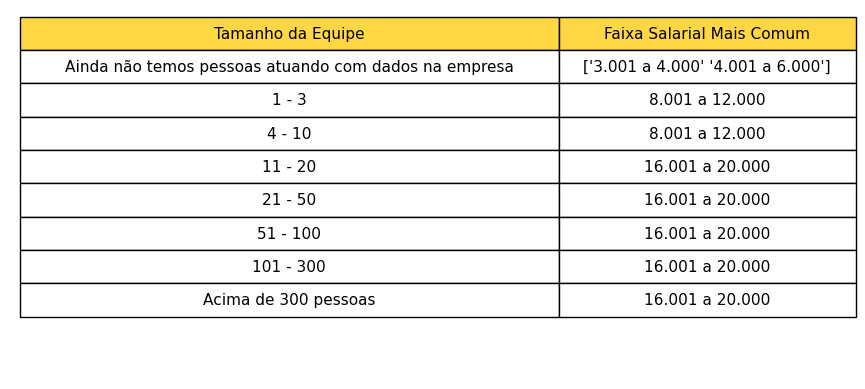

In [48]:
# separando os dados para a tabela
df_tabela = df_equipe[['tamanho_equipe', 'faixa_salario']].groupby('tamanho_equipe').agg(pd.Series.mode).reset_index()
df_tabela['faixa_salario'] = df_tabela['faixa_salario'].astype('str')

# criando a tabela
fig, ax = plt.subplots()
ax.set_axis_off()
table = ax.table(
    cellText = df_tabela.values,
    cellLoc ='center',
    colLabels = ['Tamanho da Equipe', 'Faixa Salarial Mais Comum'],
    colColours =[amarelo, amarelo],
    loc ='upper left')

table.auto_set_font_size(False)
table.set_fontsize(11)
table.auto_set_column_width(col=list(range(len(df_tabela.columns))))
table.scale(1.5,2)

# Calculadora da Satisfação

Utilizando os dados do State of Data 2022, desenvolvi uma ferramenta que faz um prognóstico utilizando informações do colaborador ou colaboradora.

In [49]:
from IPython.display import IFrame
url = "https://stateofdata2022.onrender.com/"
IFrame(url, width=1000, height=1200)


# Mais informações sobre como é calculada a Satisfação
# https://github.com/alanxfelipex/state-of-data-2022


# Resumo e Conclusões 

* A terceira principal atividade de uma pessoa que trabalha na gestão de equipes de dados é a contratação e a retenção de talentos
* Existe uma tendência de queda no desafio de contratar pessoas
* Pessoas insatisfeitas buscam novas oportunidades de Trabalho
* No modelo de trabalho presencial há mais pessoas insatisfeitas do que satisfeitas
* Quanto maior flexibilidade em relação a trabalhar em casa, maior a satisfação
* O maior número de insatisfeitos estão em faixas salarias menores
* Com algumas exceções no extremo, quanto maior o salário, maior a satisfação
* Pessoas que trabalham em empresas com equipe estão mais satisfeitas que pessoas que trabalham em empresas sem equipe
* Quanto maior a equipe, maior a satisfação